In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import cmath
import math
from pylab import *
from matplotlib import rc, rcParams
from joblib import Parallel, delayed
import networkx as nx
import random

In [2]:
# Monte Calro simulation for the co-evolution of the fully dynamical binary state interaction and the resource dynamics.

def Sus(N,k,g,l0,e_C,e_D,Rp0,coun,o):
    x0=g/100   # initial value of density of positive nodes (cooporatives)
    R=Rp0*(1-e_C)
    N_MC=300000   # Monte Carlo steps

    #### Network Creating ###################################################
    # G=nx.Graph(G)
    G=nx.barabasi_albert_graph(N, int(k/2), seed=None , initial_graph=None)
    G=nx.erdos_renyi_graph(N, k/N, seed=None, directed=False)
    # actual_degrees = [d for v, d in G.degree()]

    #### Seting the initial values ##########################################

    opinion = [*np.ones(int(x0*N)), *(-np.ones(int((1-x0)*N)))]
    if len(opinion)!=N:
        opinion.append(-1.0)
    random.shuffle(opinion)

    # print(opinion)
    # nx.set_node_attributes(G, opinion, "opinion")
    for node in G.nodes:
        G.nodes[node]["opinion"] = opinion[node]

    L=G.number_of_edges()
    #print(L)
    interaction = [*np.ones(int(l0*L)), *(-np.ones(int((1-l0)*L)))]
    if len(interaction)!=L:
        interaction.append(-1.0)
    # print(interaction)
    random.shuffle(interaction)
    # print(interaction)

    # nx.set_edge_attributes(G, interaction, "interaction")
    t=0
    for edge in G.edges:
        G.edges[edge]["interaction"] = interaction[t]
        t+=1
    del t
    Edge_List=list(G.edges)
    # Node_List=list(G.nodes)


    #### Time evolution of densities  #####################################

    # st = time.process_time()
    a=[]
    b=[]
    c=[]
    d=[]
    e=[]
    f=[]
    R_p=[]
    x=[]
    for h in range(N_MC):
        L1=random.randint(0, L-1)
    #     print(L1)
        Edge_List[L1]
        m=G.nodes[Edge_List[L1][0]]["opinion"]
        n=G.nodes[Edge_List[L1][1]]["opinion"]
        oo=G[Edge_List[L1][0]][Edge_List[L1][1]]["interaction"]

        P_l=m*n*oo
        P_e=m+n
        P_n= np.random.randint(2)
        p_R = random.uniform(0,1) 
        p_p = random.uniform(0,1)

        if (P_l==-1 and P_e==2):
            if (p_R<(R/(1-e_C))):
                G.nodes[Edge_List[L1][P_n]]["opinion"]=-1
            else:
                G[Edge_List[L1][0]][Edge_List[L1][1]]["interaction"]=1


        if (P_l==-1 and P_e==-2):
            if (p_R<(R/(1-e_C))):
                G[Edge_List[L1][0]][Edge_List[L1][1]]["interaction"]=1
            else:
                G.nodes[Edge_List[L1][P_n]]["opinion"]=1


        if (P_l==-1 and P_e==0):
            if (p_R<(R/(1-e_C))):
                G.nodes[Edge_List[L1][0]]["opinion"]=-1
                G.nodes[Edge_List[L1][1]]["opinion"]=-1
            else:
                if(p_p<.5):
                    G.nodes[Edge_List[L1][0]]["opinion"]=1
                    G.nodes[Edge_List[L1][1]]["opinion"]=1
                else:
                    G[Edge_List[L1][0]][Edge_List[L1][1]]["interaction"]=-1

        nn=0
        for i in range(N):
            nn=nn+(G.nodes[i]["opinion"]+1)/2;
        ng=nn/N
        R=R+(R*(1-R)-R*(ng*e_C+(1-ng)*e_D))/L;

        Rhompp=0
        Rhopmp=0
        Rhommm=0
        Rhoppp=0
        Rhompm=0
        Rhommp=0
        for i in range(L):
            m=G.nodes[Edge_List[i][0]]["opinion"]
            n=G.nodes[Edge_List[i][1]]["opinion"]
            oo=G[Edge_List[i][0]][Edge_List[i][1]]["interaction"]
        #         print(m,n,o)
            P_k=(m+n+3*oo)
        #         print(P_k)
            if P_k ==3:
                Rhompp+=1
            if P_k ==-1:
                Rhopmp+=1
            if P_k ==-5:
                Rhommm+=1
            if P_k ==5:
                Rhoppp+=1
            if P_k ==1:
                Rhompm+=1
            if P_k ==-3:
                Rhommp+=1
        if (h/coun)==int(h/coun) or h==0:
            a.append(Rhopmp/L)
            c.append(Rhommm/L)
            b.append(Rhoppp/L)
            d.append(Rhompm/L)
            e.append(Rhompp/L)
            f.append(Rhommp/L)
            x.append(ng)
            R_p.append(R/(1-e_C))
    all_results =[a,b,c,d,e,f,R_p,x]
    np.save('Sus_%d_%d_%.1f_%.1f_%d_50_%d' % (N,k,e_C,e_D,g,o), all_results)


In [3]:
N=1000 # Number of nodes
l0=0.5  # initial value density of positive links
g=25 # persentage of cooporatives
e_C=.9  # extraction rate of a cooperator 
e_D=1.9   # extraction rate of a defector
Rp0=2/3    # initial value of normalased level of resourse
K=[12] # list of mean degrees 
o=[1] # label of realization
coun=200 

results = Parallel(n_jobs=1)(delayed(Sus)(N,i,g,l0,e_C,e_D,Rp0,coun,j) for i in K for j in o)


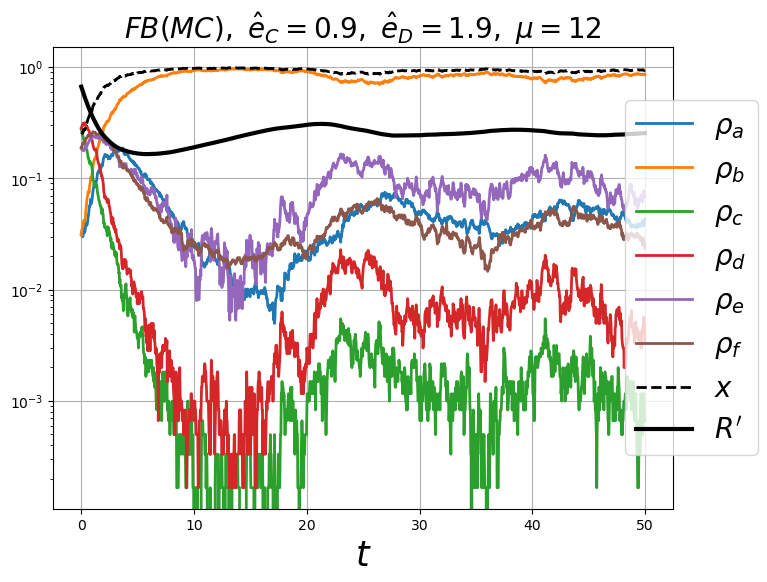

In [4]:
# Plotiing the trajectories
f=figure(figsize=(8,6))

Probability = np.arange(0.05, 1, .05)

k=K[0]
L=N*(k)/2
coun=200
rho_e_p_MF=np.load("Sus_%d_%d_%.1f_%.1f_25_50_1.npy" % (N,k,e_C,e_D))
rho_e_p_MF[0]
t=range(len(rho_e_p_MF[0]))
# print(np.array(t))
T=np.array(t)/L*coun
plt.plot(T,rho_e_p_MF[0], lw=2, label="$\\rho_a$ ")
plt.plot(T,rho_e_p_MF[1], lw=2, label="$\\rho_b$ ")
plt.plot(T,rho_e_p_MF[2], lw=2, label="$\\rho_c$ ")
plt.plot(T,rho_e_p_MF[3], lw=2, label="$\\rho_d$ ")
plt.plot(T,rho_e_p_MF[4], lw=2, label="$\\rho_e$ ")
plt.plot(T,rho_e_p_MF[5], lw=2, label="$\\rho_f$ ")
plt.plot(T,rho_e_p_MF[7], '--', color="k", lw=2, label="$x$ ")
plt.plot(T,rho_e_p_MF[6], lw=3, color="k",label="$R'$ ")

plt.legend(fontsize=20,loc='center left', bbox_to_anchor=(.9, 0.5))
plt.yscale("log")    
plt.xlabel('$t$', fontsize=25)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.title('$FB (MC), \ \hat{e}_C=%.1f, \ \hat{e}_D=%.1f, \ \\mu=%s$' % (e_C,e_D,k),fontsize=20)
plt.grid(True)


# plt.savefig('Sus_MC_%d_%.1f_%.1f_%.1f_25_50_1.eps' % (N,k,e_C,e_D), format='eps')

